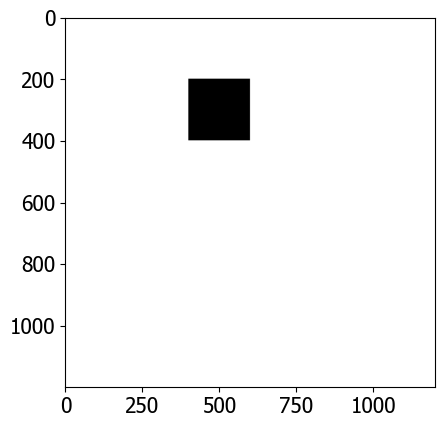

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def create_map(width, height, obstacles=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    # Add black obstacles
    for obstacle in obstacles:
        x, y, obstacle_width, obstacle_height = obstacle
        map_array[y:y + obstacle_height, x:x + obstacle_width] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200 , 200)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles)
#save_map_to_npy(map_array, 'Downloads/map_with_obstacles.npy')

# Visualize the map
visualize_map(map_array)


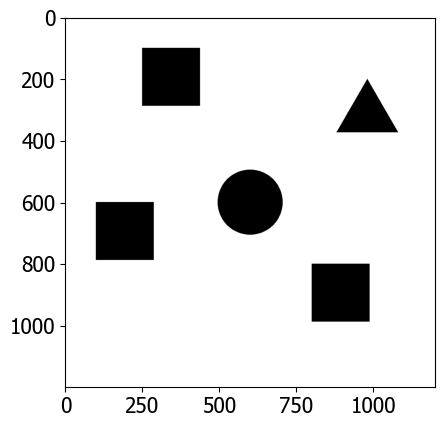

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, polygon, disk

def create_map(width, height, shapes=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    for shape in shapes:
        shape_type, params = shape[0], shape[1:]
        
        if shape_type == 'rectangle':
            rr, cc = rectangle(start=params[:2], end=(params[0] + params[2], params[1] + params[3]), extent=None, shape=map_array.shape)
            map_array[rr, cc] = 0
        elif shape_type == 'triangle':
            rr, cc = polygon([params[0], params[0] + params[2], params[0] + params[2]], 
                             [params[1], params[1] + params[3]//2 , params[1] - params[3]//2], shape=map_array.shape)
            map_array[rr, cc] = 0
        if shape_type == 'disk':
            cy, cx, radius = params
            rr, cc = disk((cy, cx), radius, shape=map_array.shape)
            map_array[rr , cc] = 0
#         elif shape_type == 'circle':
#             rr, cc = circle(params[1], params[0], params[2], shape=map_array.shape)
#             map_array[rr, cc] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200, 200)]

# Additional shapes (triangle, square, circle, square, circle)
shapes = [('triangle', 200, 980, 173, 200), # h = 200 , b = 231
          ('rectangle', 800, 800, 187, 187),
          ('rectangle', 100, 250, 187, 187),
          ('rectangle', 600, 100, 187, 187),
          ('disk', 600, 600, 105.5)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles + shapes)
#save_map_to_npy(map_array, 'Downloads/map_with_shapes.npy')

# Visualize the map
visualize_map(map_array)


In [ ]:
#For rectangle we need starting row coordinate and starting column coordinate and we also need its height and width
#width increases to the right and the height increases downwards

#For triangle we need the top two coordinates, the height and base length

#for disk just the center and radius

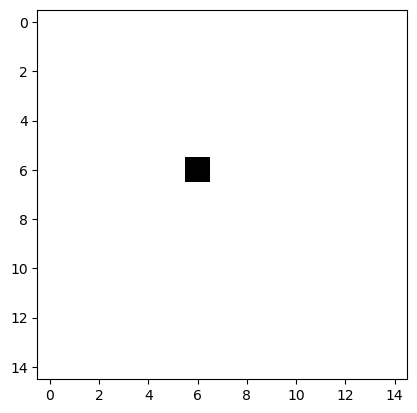

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a white background image
image = np.ones((15, 15), dtype=np.uint8) * 255

# Define the coordinates for the black square
square_size = 1
square_center = (6, 6)  # Center of the image

# Calculate the top-left corner of the square
square_top_left = (square_center[0] - square_size // 2, square_center[1] - square_size // 2)

# Draw the black square on the image
image[square_top_left[1]:square_top_left[1] + square_size, square_top_left[0]:square_top_left[0] + square_size] = 0

# Display the binary image
plt.imshow(image, cmap='gray')
plt.show()


In [9]:
print(1 // 2)

0


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


list_images = []

for i in range (10):
    img = np.ones((15, 15), dtype=np.uint8) * 255
    for l in range(7):
        choice1 = ['square', 'rectangle']
        shape = random.choice(choice1)
        if (shape == 'rectangle'):
            choice2 = ['length' , 'breadth']
            dim = random.choice(choice2)
            if (dim == 'length') :
                choice3 = ['one' , 'two']
                variance = random.choice(choice3)
                if(variance == 'one'):
                    x = random.randint(0, 13)
                    y = random.randint(4 , 14)
                    x_top = x
                    y_top = y - 4
                    img[x_top : x_top + 2 , y_top : y_top  + 5] = 0
                    print('area of rectangle in 1')
                    print((x_top + 1 - x_top) * (y_top  + 4 - y_top))
                if(variance == 'two'):
                    x = random.randint(1, 13)
                    y = random.randint(1, 13)
                    x_top = x - 2 // 2
                    y_top = y - 2 // 2
                    img[x_top : x_top + 3 , y_top : y_top + 3] = 0
                    print('area of square in 2')
                    print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
            if (dim == 'breadth'):
                choice3 = ['one' , 'two']
                variance = random.choice(choice3)
                if (variance == 'two'):
                    x = random.randint(1, 13)
                    y = random.randint(1, 13)
                    x_top = x - 2 // 2
                    y_top = y - 2 // 2
                    img[x_top : x_top + 3 , y_top : y_top + 3] = 0
                    print('area of square in 3')
                    print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
                if (variance == 'one'):
                    y = random.randint(1, 14)
                    x = random.randint(0 , 10)
                    x_top = x
                    y_top = y - 1
                    img[x_top : x_top + 5 , y_top : y_top + 2] = 0
                    print('area of rectangle in 4')
                    print((x_top + 4 - x_top) * (y_top  + 1 - y_top))
        if (shape == 'square'):
            x = random.randint(1, 13)
            y = random.randint(1, 13)
            x_top = x - 2 // 2
            y_top = y - 2 // 2
            img[x_top : x_top + 3 , y_top : y_top + 3] = 0
            print('area of square in 4')
            print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
    list_images.append(img) 
    print('Iteration over')
            
                
                
                
                
                
                
                
                
                    

area of square in 4
4
area of rectangle in 1
4
area of square in 4
4
area of square in 4
4
area of square in 4
4
area of rectangle in 4
4
area of square in 4
4
Iteration over
area of square in 3
4
area of square in 4
4
area of square in 2
4
area of square in 2
4
area of square in 4
4
area of square in 3
4
area of square in 3
4
Iteration over
area of rectangle in 1
4
area of square in 4
4
area of rectangle in 4
4
area of square in 4
4
area of square in 2
4
area of rectangle in 4
4
area of square in 4
4
Iteration over
area of square in 4
4
area of square in 4
4
area of square in 2
4
area of square in 4
4
area of square in 2
4
area of rectangle in 1
4
area of square in 4
4
Iteration over
area of rectangle in 4
4
area of square in 4
4
area of square in 2
4
area of square in 3
4
area of rectangle in 1
4
area of square in 4
4
area of square in 4
4
Iteration over
area of square in 4
4
area of rectangle in 1
4
area of square in 3
4
area of square in 3
4
area of square in 3
4
area of square in 

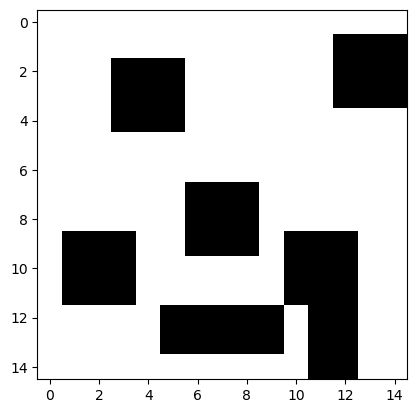

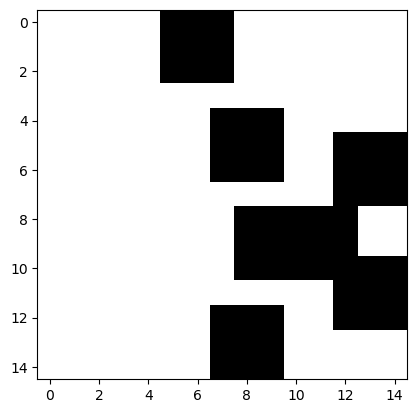

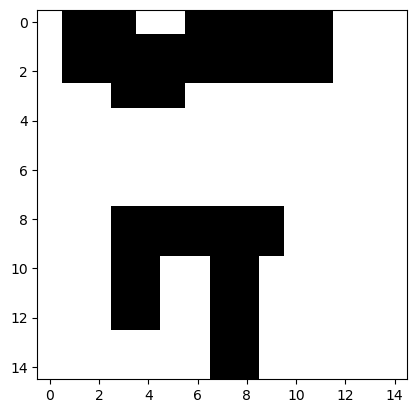

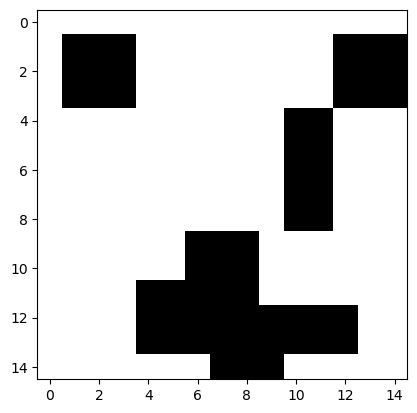

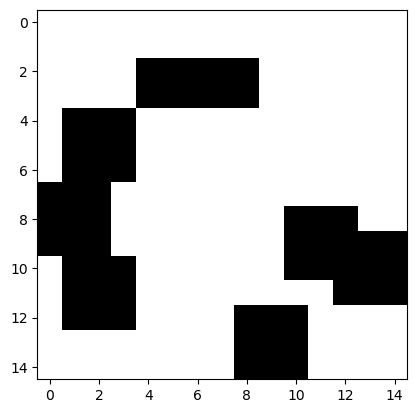

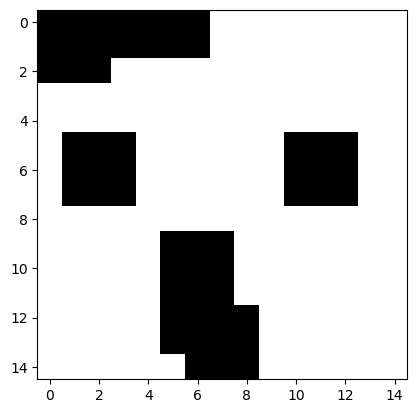

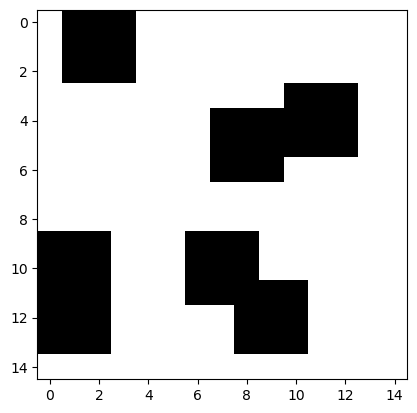

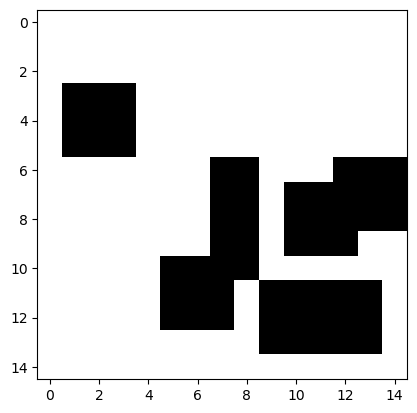

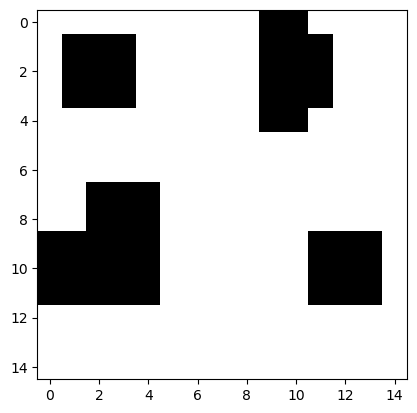

In [23]:

for img in list_images:
    plt.imshow(img , cmap = 'gray')
    plt.show()

Total number of pixels: 16384
128 128
(128, 128)


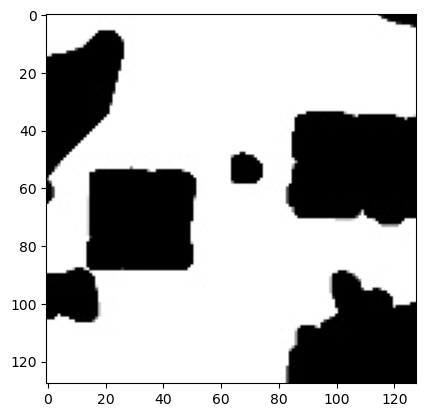

In [10]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(r"C:\Users\Navdeep\Downloads\0.jpg")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


height, width= gray_image.shape

total_pixels = height * width

print("Total number of pixels:", total_pixels)
print(height , width)
print(gray_image.shape)

plt.imshow(gray_image , cmap = 'gray')

In [53]:
#The following code is related to autoencoders
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [54]:
#Desining the data loader
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_paths[idx])
        image = cv2.imread(img_name , cv2.IMREAD_GRAYSCALE)
        
        if self.transform:
            image = self.transform(image)
            
        return image
    
    
class ToCudaTransform(object):
    def __call__(self, tensor):
        if torch.cuda.is_available():
            return tensor.to(torch.device("cuda"))
        else:
            return tensor

        
root_dir = r'C:\Users\Navdeep\Downloads\images\images'
transform = transforms.Compose([
    transforms.ToTensor(),
    ToCudaTransform()  # Add custom transform to move tensor to CUDA
])

custom_dataset = CustomDataset(root_dir=root_dir, transform=transform)

data_loader = DataLoader(custom_dataset, batch_size=10, shuffle=True, drop_last=True)


# images , names = next(iter(data_loader))

# image = images[0]


# image = image.numpy()

# image = np.transpose(image, (1, 2, 0))

# print(names)
# plt.imshow(image)

In [55]:
validation_dataset = CustomDataset(root_dir=r"C:\Users\Navdeep\Downloads\validation_images", transform=transform)
validation_data_loader = DataLoader(validation_dataset , batch_size = 15 , shuffle = False , drop_last = True)

In [49]:
#Designing the encoder decoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64 , 128 , 3 , stride = 2 , padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 , 256 , 3 , stride = 2 , padding = 1),
            nn.ReLU(),
            nn.Conv2d(256 , 512 , 3 , stride = 2 , padding = 1),
            nn.ReLU(),
            nn.Conv2d(512 , 1024 , 2),
            nn.ReLU(),
            nn.Conv2d(1024 , 2048 , 1),
            nn.ReLU(),
            nn.Conv2d(2048 , 28 , 1)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(28, 2048, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(2048, 1024, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(1024, 512, 2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256,  3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
            
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    

In [50]:
mse_loss = nn.MSELoss()
lam=1e-2
def loss_function(W, x, recons_x, h):
    mse = mse_loss(recons_x, x)
    # Since: W is shape of N_hidden x N. So, we do not need to transpose it as
    # opposed to #1
    dh = h * (1 - h) # Hadamard product produces size N_batch x N_hidden
#     print('dh shape')
#     print(dh.shape)
    # Sum through the input dimension to improve efficiency, as suggested in #1
    w_sum = torch.sum(Variable(W)**2, dim=1)
#     print('w_sum shape')
#     print(w_sum.shape)
    # unsqueeze to avoid issues with torch.mv
    w_sum = w_sum.unsqueeze(1) # shape N_hidden x 1
    contractive_loss = torch.sum(torch.mm(dh**2, w_sum), 0)
    return mse + contractive_loss.mul_(lam)

In [51]:
autoencoder = Autoencoder()
if torch.cuda.is_available():
    autoencoder = autoencoder.to(torch.device("cuda"))

In [52]:
#writing the training loop
num_epochs = 3000
outputs = []
params = list(autoencoder.parameters())
optimizer = torch.optim.Adagrad(params)
for epoch in range(num_epochs):
    for (img) in data_loader:
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        h = autoencoder.encoder(img)
#         print('h before conversion')
#         print(h.shape)
        recon = autoencoder.decoder(h)
        encoder_state_dict = autoencoder.encoder.state_dict()
#         print(encoder_state_dict)
        encoder_keys = encoder_state_dict.keys()
        #print(encoder_keys)
        W = encoder_state_dict['16.weight']
#         print('W shape before conversion')
#         print(W.shape)
        W = W.view(28 , -1)
#         print('W shape after conversion')
#         print(W.shape)
#         print('h after conversion')
        h = h.view(10, -1)
#         print(h.shape)
        loss = loss_function(W ,img ,recon , h)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))
    
    
torch.save(autoencoder.encoder.state_dict(), r'C:\Users\Navdeep\Downloads\cae_encoder2.pkl')

Epoch:1, Loss:0.2373
Epoch:2, Loss:0.2240
Epoch:3, Loss:0.2343
Epoch:4, Loss:0.2289
Epoch:5, Loss:0.2290
Epoch:6, Loss:0.2471
Epoch:7, Loss:0.2349
Epoch:8, Loss:0.2174
Epoch:9, Loss:0.2053
Epoch:10, Loss:0.2119
Epoch:11, Loss:0.2186
Epoch:12, Loss:0.2378
Epoch:13, Loss:0.2248
Epoch:14, Loss:0.1976
Epoch:15, Loss:0.1898
Epoch:16, Loss:0.2196
Epoch:17, Loss:0.2254
Epoch:18, Loss:0.2295
Epoch:19, Loss:0.2144
Epoch:20, Loss:0.1834
Epoch:21, Loss:0.2158
Epoch:22, Loss:0.2227
Epoch:23, Loss:0.2213
Epoch:24, Loss:0.2176
Epoch:25, Loss:0.2232
Epoch:26, Loss:0.2218
Epoch:27, Loss:0.2278
Epoch:28, Loss:0.2036
Epoch:29, Loss:0.2182
Epoch:30, Loss:0.1799
Epoch:31, Loss:0.2111
Epoch:32, Loss:0.2288
Epoch:33, Loss:0.2264
Epoch:34, Loss:0.2089
Epoch:35, Loss:0.2183
Epoch:36, Loss:0.1979
Epoch:37, Loss:0.2150
Epoch:38, Loss:0.2264
Epoch:39, Loss:0.2221
Epoch:40, Loss:0.1988
Epoch:41, Loss:0.2066
Epoch:42, Loss:0.1997
Epoch:43, Loss:0.1943
Epoch:44, Loss:0.2005
Epoch:45, Loss:0.1914
Epoch:46, Loss:0.21

Epoch:362, Loss:0.0462
Epoch:363, Loss:0.0697
Epoch:364, Loss:0.0693
Epoch:365, Loss:0.0616
Epoch:366, Loss:0.0610
Epoch:367, Loss:0.0702
Epoch:368, Loss:0.0461
Epoch:369, Loss:0.0608
Epoch:370, Loss:0.0906
Epoch:371, Loss:0.0646
Epoch:372, Loss:0.0598
Epoch:373, Loss:0.0646
Epoch:374, Loss:0.0529
Epoch:375, Loss:0.0466
Epoch:376, Loss:0.0534
Epoch:377, Loss:0.0699
Epoch:378, Loss:0.0479
Epoch:379, Loss:0.0517
Epoch:380, Loss:0.0516
Epoch:381, Loss:0.0568
Epoch:382, Loss:0.0605
Epoch:383, Loss:0.0503
Epoch:384, Loss:0.0431
Epoch:385, Loss:0.0543
Epoch:386, Loss:0.0542
Epoch:387, Loss:0.0629
Epoch:388, Loss:0.0641
Epoch:389, Loss:0.0738
Epoch:390, Loss:0.0595
Epoch:391, Loss:0.0621
Epoch:392, Loss:0.0883
Epoch:393, Loss:0.0657
Epoch:394, Loss:0.0555
Epoch:395, Loss:0.0476
Epoch:396, Loss:0.0470
Epoch:397, Loss:0.0424
Epoch:398, Loss:0.0518
Epoch:399, Loss:0.0519
Epoch:400, Loss:0.0517
Epoch:401, Loss:0.0523
Epoch:402, Loss:0.0409
Epoch:403, Loss:0.0479
Epoch:404, Loss:0.0543
Epoch:405, 

Epoch:719, Loss:0.0200
Epoch:720, Loss:0.0216
Epoch:721, Loss:0.0244
Epoch:722, Loss:0.0351
Epoch:723, Loss:0.0279
Epoch:724, Loss:0.0212
Epoch:725, Loss:0.0184
Epoch:726, Loss:0.0196
Epoch:727, Loss:0.0231
Epoch:728, Loss:0.0205
Epoch:729, Loss:0.0206
Epoch:730, Loss:0.0277
Epoch:731, Loss:0.0187
Epoch:732, Loss:0.0169
Epoch:733, Loss:0.0198
Epoch:734, Loss:0.0157
Epoch:735, Loss:0.0151
Epoch:736, Loss:0.0253
Epoch:737, Loss:0.0234
Epoch:738, Loss:0.0232
Epoch:739, Loss:0.0191
Epoch:740, Loss:0.0185
Epoch:741, Loss:0.0142
Epoch:742, Loss:0.0210
Epoch:743, Loss:0.0174
Epoch:744, Loss:0.0161
Epoch:745, Loss:0.0184
Epoch:746, Loss:0.0161
Epoch:747, Loss:0.0160
Epoch:748, Loss:0.0200
Epoch:749, Loss:0.0172
Epoch:750, Loss:0.0195
Epoch:751, Loss:0.0245
Epoch:752, Loss:0.0230
Epoch:753, Loss:0.0283
Epoch:754, Loss:0.0248
Epoch:755, Loss:0.0254
Epoch:756, Loss:0.0158
Epoch:757, Loss:0.0189
Epoch:758, Loss:0.0213
Epoch:759, Loss:0.0252
Epoch:760, Loss:0.0155
Epoch:761, Loss:0.0277
Epoch:762, 

Epoch:1073, Loss:0.0160
Epoch:1074, Loss:0.0137
Epoch:1075, Loss:0.0120
Epoch:1076, Loss:0.0159
Epoch:1077, Loss:0.0139
Epoch:1078, Loss:0.0101
Epoch:1079, Loss:0.0128
Epoch:1080, Loss:0.0195
Epoch:1081, Loss:0.0117
Epoch:1082, Loss:0.0157
Epoch:1083, Loss:0.0156
Epoch:1084, Loss:0.0163
Epoch:1085, Loss:0.0121
Epoch:1086, Loss:0.0142
Epoch:1087, Loss:0.0158
Epoch:1088, Loss:0.0111
Epoch:1089, Loss:0.0139
Epoch:1090, Loss:0.0155
Epoch:1091, Loss:0.0138
Epoch:1092, Loss:0.0123
Epoch:1093, Loss:0.0164
Epoch:1094, Loss:0.0110
Epoch:1095, Loss:0.0119
Epoch:1096, Loss:0.0124
Epoch:1097, Loss:0.0145
Epoch:1098, Loss:0.0136
Epoch:1099, Loss:0.0160
Epoch:1100, Loss:0.0144
Epoch:1101, Loss:0.0143
Epoch:1102, Loss:0.0129
Epoch:1103, Loss:0.0156
Epoch:1104, Loss:0.0126
Epoch:1105, Loss:0.0198
Epoch:1106, Loss:0.0150
Epoch:1107, Loss:0.0198
Epoch:1108, Loss:0.0132
Epoch:1109, Loss:0.0144
Epoch:1110, Loss:0.0163
Epoch:1111, Loss:0.0159
Epoch:1112, Loss:0.0157
Epoch:1113, Loss:0.0132
Epoch:1114, Loss

Epoch:1415, Loss:0.0122
Epoch:1416, Loss:0.0105
Epoch:1417, Loss:0.0126
Epoch:1418, Loss:0.0117
Epoch:1419, Loss:0.0124
Epoch:1420, Loss:0.0095
Epoch:1421, Loss:0.0096
Epoch:1422, Loss:0.0147
Epoch:1423, Loss:0.0105
Epoch:1424, Loss:0.0108
Epoch:1425, Loss:0.0691
Epoch:1426, Loss:0.0175
Epoch:1427, Loss:0.0168
Epoch:1428, Loss:0.0145
Epoch:1429, Loss:0.0126
Epoch:1430, Loss:0.0082
Epoch:1431, Loss:0.0122
Epoch:1432, Loss:0.0108
Epoch:1433, Loss:0.0136
Epoch:1434, Loss:0.0140
Epoch:1435, Loss:0.0108
Epoch:1436, Loss:0.0091
Epoch:1437, Loss:0.0107
Epoch:1438, Loss:0.0133
Epoch:1439, Loss:0.0130
Epoch:1440, Loss:0.0100
Epoch:1441, Loss:0.0106
Epoch:1442, Loss:0.0088
Epoch:1443, Loss:0.0091
Epoch:1444, Loss:0.0118
Epoch:1445, Loss:0.0171
Epoch:1446, Loss:0.0121
Epoch:1447, Loss:0.0138
Epoch:1448, Loss:0.0101
Epoch:1449, Loss:0.0120
Epoch:1450, Loss:0.0130
Epoch:1451, Loss:0.0159
Epoch:1452, Loss:0.0125
Epoch:1453, Loss:0.0138
Epoch:1454, Loss:0.0127
Epoch:1455, Loss:0.0099
Epoch:1456, Loss

Epoch:1757, Loss:0.0108
Epoch:1758, Loss:0.0104
Epoch:1759, Loss:0.0101
Epoch:1760, Loss:0.0067
Epoch:1761, Loss:0.0079
Epoch:1762, Loss:0.0077
Epoch:1763, Loss:0.0119
Epoch:1764, Loss:0.0117
Epoch:1765, Loss:0.0104
Epoch:1766, Loss:0.0106
Epoch:1767, Loss:0.0093
Epoch:1768, Loss:0.0129
Epoch:1769, Loss:0.0101
Epoch:1770, Loss:0.0094
Epoch:1771, Loss:0.0091
Epoch:1772, Loss:0.0088
Epoch:1773, Loss:0.0121
Epoch:1774, Loss:0.0083
Epoch:1775, Loss:0.0088
Epoch:1776, Loss:0.0164
Epoch:1777, Loss:0.0113
Epoch:1778, Loss:0.0102
Epoch:1779, Loss:0.0144
Epoch:1780, Loss:0.0120
Epoch:1781, Loss:0.0084
Epoch:1782, Loss:0.0088
Epoch:1783, Loss:0.0090
Epoch:1784, Loss:0.0146
Epoch:1785, Loss:0.0102
Epoch:1786, Loss:0.0104
Epoch:1787, Loss:0.0107
Epoch:1788, Loss:0.0135
Epoch:1789, Loss:0.0108
Epoch:1790, Loss:0.0188
Epoch:1791, Loss:0.0113
Epoch:1792, Loss:0.0132
Epoch:1793, Loss:0.0124
Epoch:1794, Loss:0.0135
Epoch:1795, Loss:0.0113
Epoch:1796, Loss:0.0070
Epoch:1797, Loss:0.0136
Epoch:1798, Loss

Epoch:2099, Loss:0.0063
Epoch:2100, Loss:0.0112
Epoch:2101, Loss:0.0110
Epoch:2102, Loss:0.0090
Epoch:2103, Loss:0.0114
Epoch:2104, Loss:0.0100
Epoch:2105, Loss:0.0080
Epoch:2106, Loss:0.0090
Epoch:2107, Loss:0.0124
Epoch:2108, Loss:0.0080
Epoch:2109, Loss:0.0069
Epoch:2110, Loss:0.0105
Epoch:2111, Loss:0.0060
Epoch:2112, Loss:0.0077
Epoch:2113, Loss:0.0072
Epoch:2114, Loss:0.0077
Epoch:2115, Loss:0.0091
Epoch:2116, Loss:0.0113
Epoch:2117, Loss:0.0107
Epoch:2118, Loss:0.0076
Epoch:2119, Loss:0.0095
Epoch:2120, Loss:0.0084
Epoch:2121, Loss:0.0070
Epoch:2122, Loss:0.0078
Epoch:2123, Loss:0.0079
Epoch:2124, Loss:0.0090
Epoch:2125, Loss:0.0099
Epoch:2126, Loss:0.0065
Epoch:2127, Loss:0.0089
Epoch:2128, Loss:0.0076
Epoch:2129, Loss:0.0062
Epoch:2130, Loss:0.0086
Epoch:2131, Loss:0.0106
Epoch:2132, Loss:0.0134
Epoch:2133, Loss:0.1023
Epoch:2134, Loss:0.0237
Epoch:2135, Loss:0.0276
Epoch:2136, Loss:0.0176
Epoch:2137, Loss:0.0091
Epoch:2138, Loss:0.0093
Epoch:2139, Loss:0.0083
Epoch:2140, Loss

Epoch:2441, Loss:0.0065
Epoch:2442, Loss:0.0116
Epoch:2443, Loss:0.0049
Epoch:2444, Loss:0.0096
Epoch:2445, Loss:0.0073
Epoch:2446, Loss:0.0084
Epoch:2447, Loss:0.0071
Epoch:2448, Loss:0.0091
Epoch:2449, Loss:0.0088
Epoch:2450, Loss:0.0105
Epoch:2451, Loss:0.0104
Epoch:2452, Loss:0.0102
Epoch:2453, Loss:0.0100
Epoch:2454, Loss:0.0065
Epoch:2455, Loss:0.0073
Epoch:2456, Loss:0.0083
Epoch:2457, Loss:0.0056
Epoch:2458, Loss:0.0085
Epoch:2459, Loss:0.0067
Epoch:2460, Loss:0.0063
Epoch:2461, Loss:0.0086
Epoch:2462, Loss:0.0083
Epoch:2463, Loss:0.0046
Epoch:2464, Loss:0.0087
Epoch:2465, Loss:0.0074
Epoch:2466, Loss:0.0074
Epoch:2467, Loss:0.0100
Epoch:2468, Loss:0.0113
Epoch:2469, Loss:0.0083
Epoch:2470, Loss:0.0082
Epoch:2471, Loss:0.0442
Epoch:2472, Loss:0.0173
Epoch:2473, Loss:0.0142
Epoch:2474, Loss:0.0077
Epoch:2475, Loss:0.0115
Epoch:2476, Loss:0.0080
Epoch:2477, Loss:0.0070
Epoch:2478, Loss:0.0100
Epoch:2479, Loss:0.0071
Epoch:2480, Loss:0.0103
Epoch:2481, Loss:0.0064
Epoch:2482, Loss

Epoch:2783, Loss:0.0067
Epoch:2784, Loss:0.0092
Epoch:2785, Loss:0.0075
Epoch:2786, Loss:0.0085
Epoch:2787, Loss:0.0080
Epoch:2788, Loss:0.0051
Epoch:2789, Loss:0.0045
Epoch:2790, Loss:0.0069
Epoch:2791, Loss:0.0088
Epoch:2792, Loss:0.0081
Epoch:2793, Loss:0.0076
Epoch:2794, Loss:0.0073
Epoch:2795, Loss:0.0059
Epoch:2796, Loss:0.0064
Epoch:2797, Loss:0.0053
Epoch:2798, Loss:0.0085
Epoch:2799, Loss:0.0057
Epoch:2800, Loss:0.0048
Epoch:2801, Loss:0.0058
Epoch:2802, Loss:0.0089
Epoch:2803, Loss:0.0069
Epoch:2804, Loss:0.0135
Epoch:2805, Loss:0.0106
Epoch:2806, Loss:0.0070
Epoch:2807, Loss:0.0049
Epoch:2808, Loss:0.0088
Epoch:2809, Loss:0.0055
Epoch:2810, Loss:0.0051
Epoch:2811, Loss:0.0111
Epoch:2812, Loss:0.0086
Epoch:2813, Loss:0.0061
Epoch:2814, Loss:0.0082
Epoch:2815, Loss:0.0045
Epoch:2816, Loss:0.0097
Epoch:2817, Loss:0.0128
Epoch:2818, Loss:0.0076
Epoch:2819, Loss:0.0071
Epoch:2820, Loss:0.0088
Epoch:2821, Loss:0.0115
Epoch:2822, Loss:0.0052
Epoch:2823, Loss:0.0088
Epoch:2824, Loss

C:\Users\Navdeep\AppData\Local\Temp\ipykernel_13640\4276901194.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(9, 2))


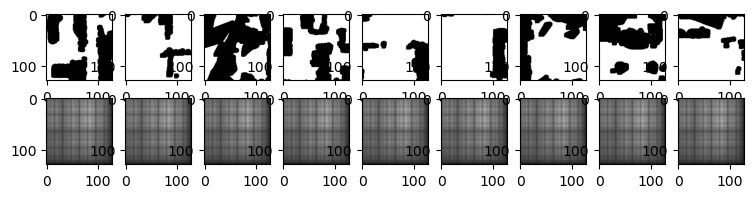

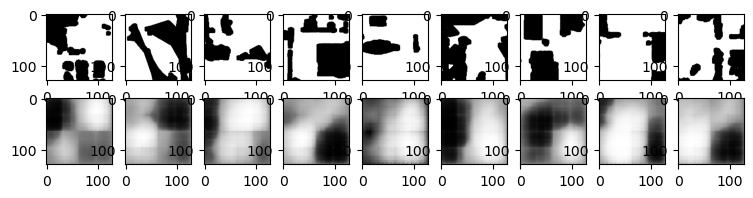

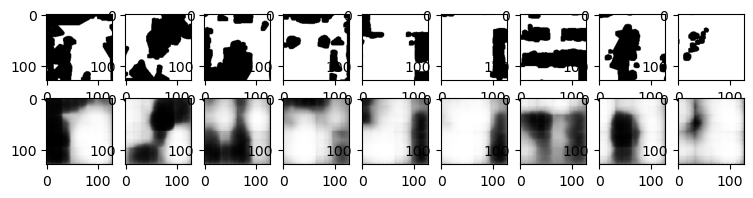

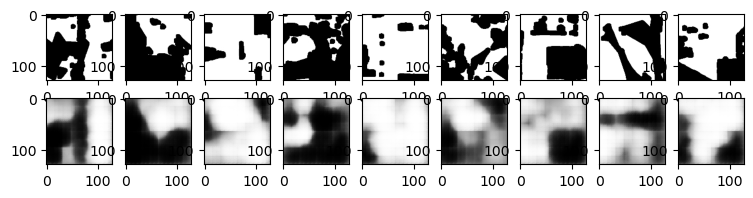

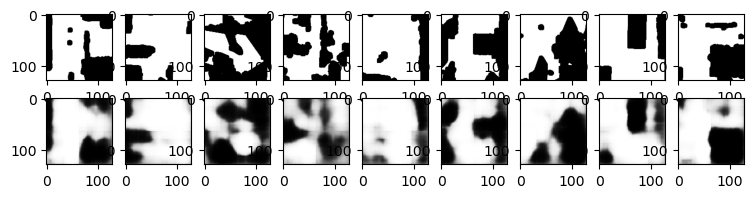

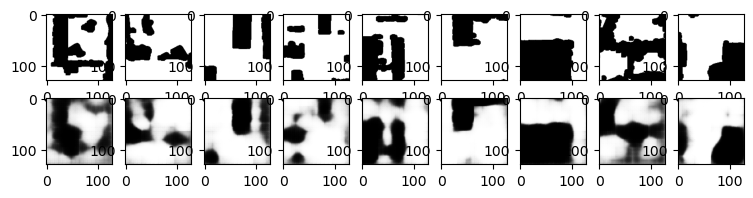

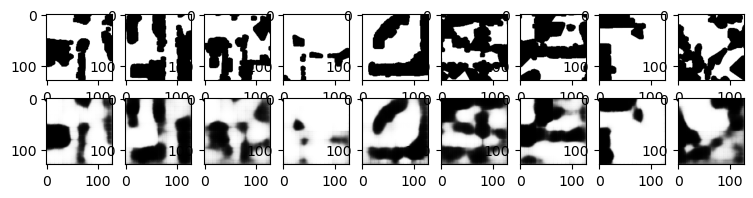

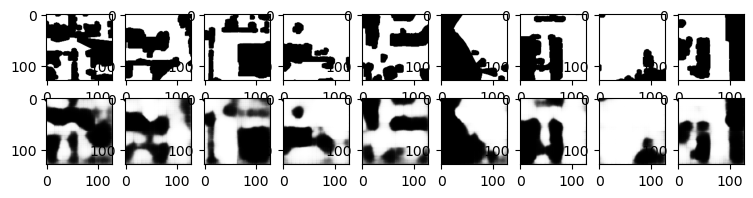

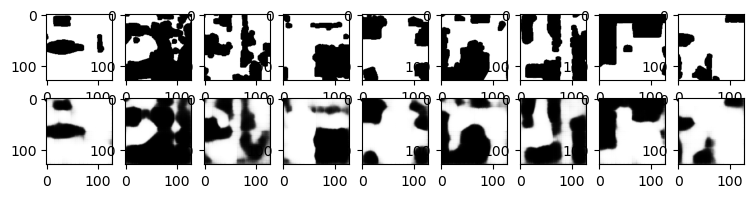

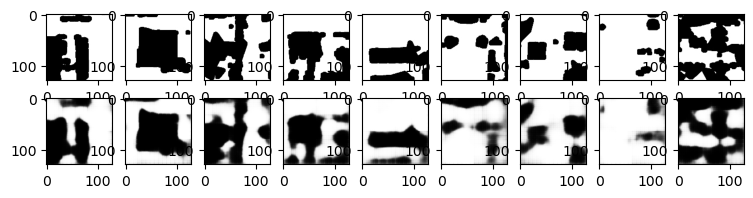

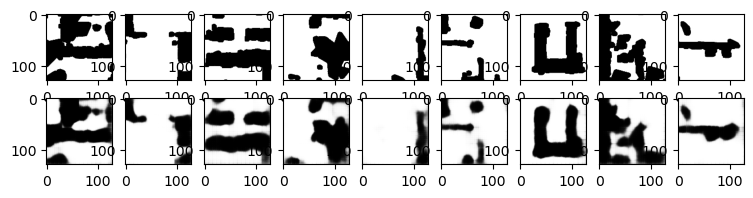

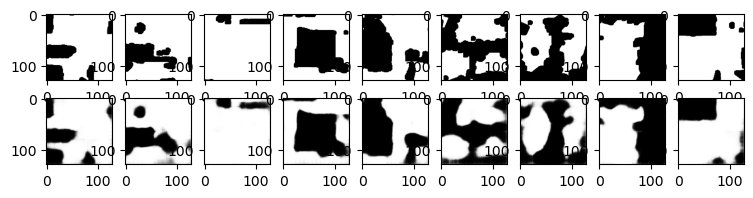

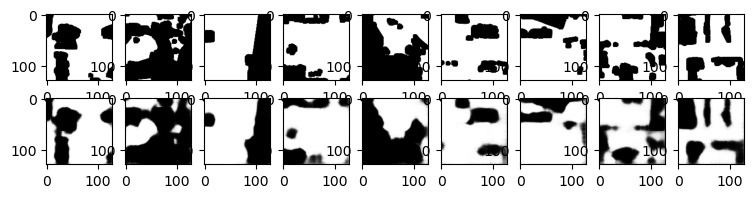

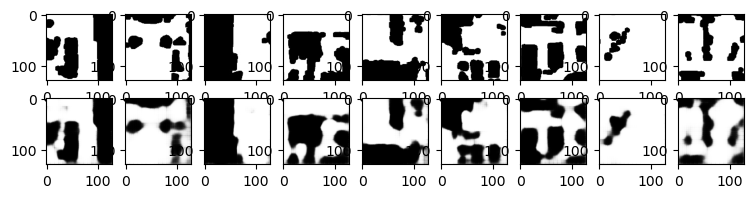

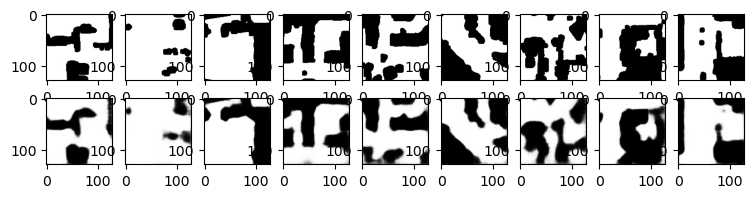

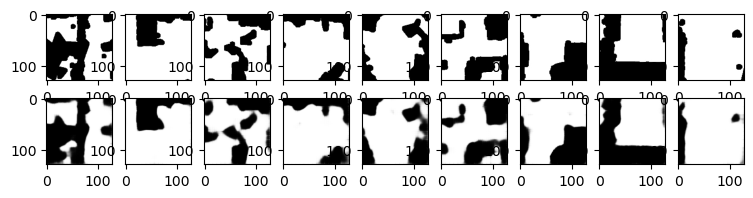

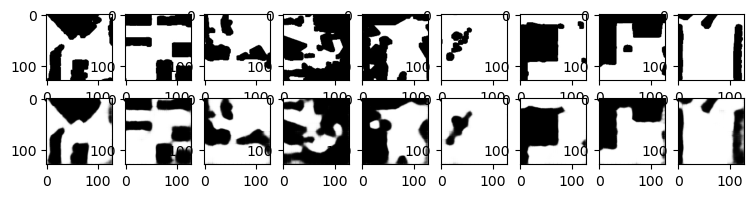

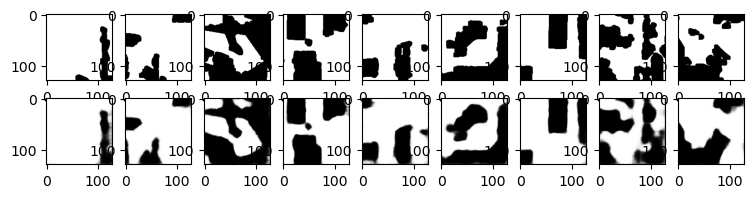

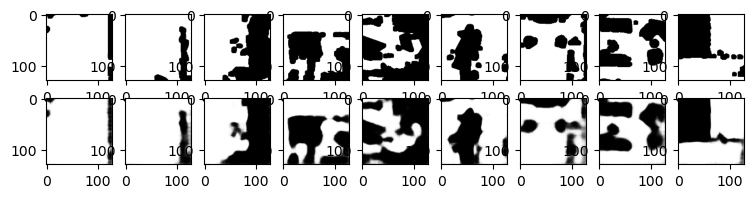

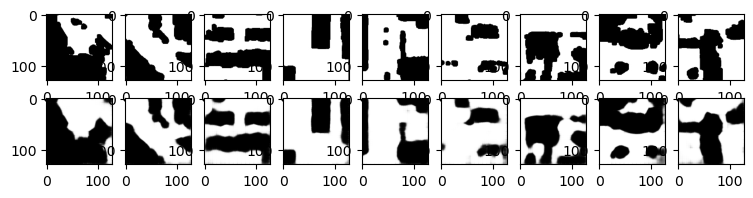

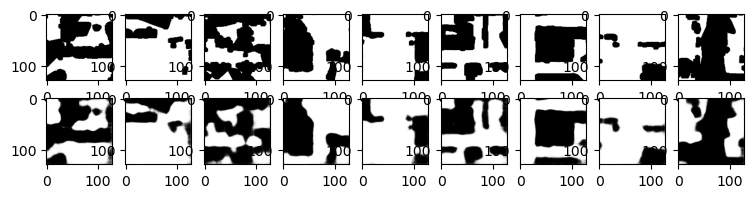

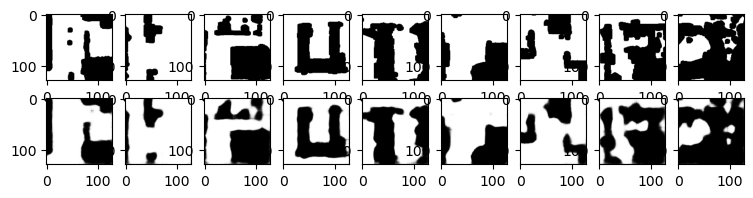

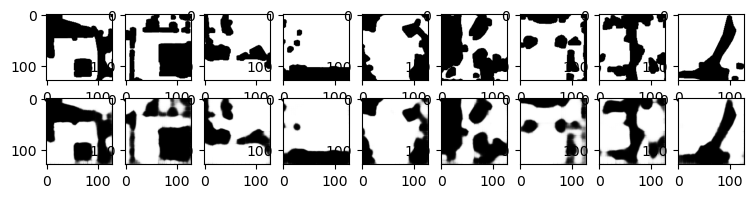

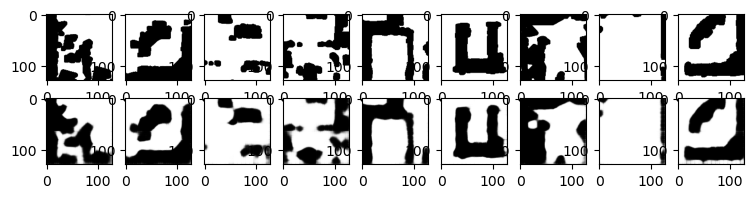

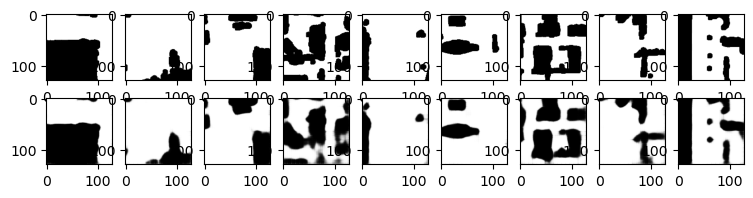

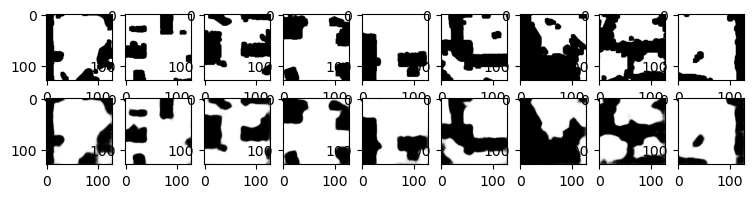

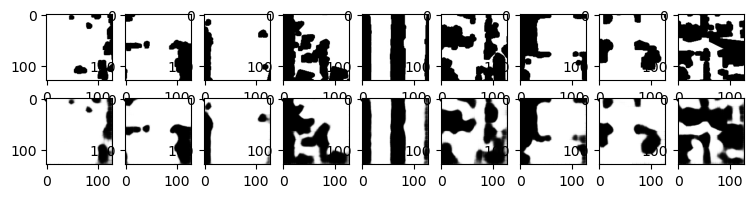

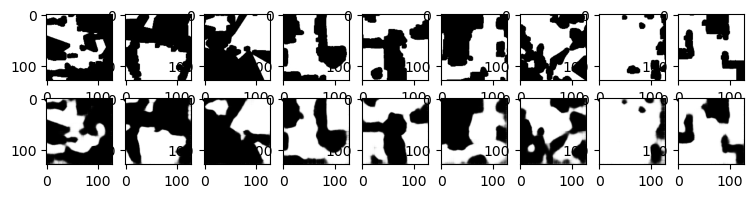

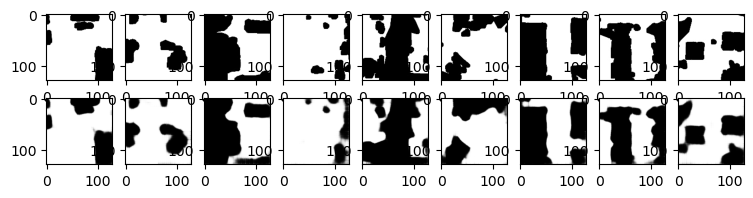

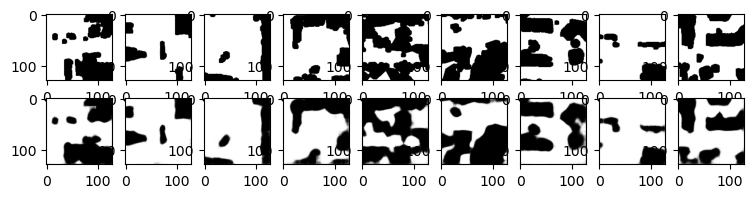

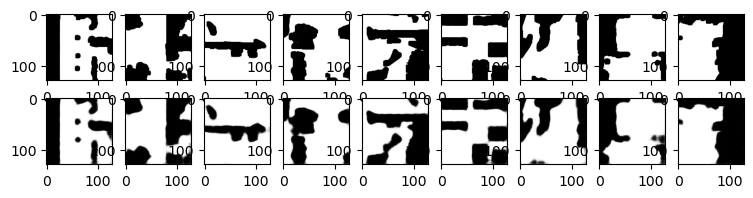

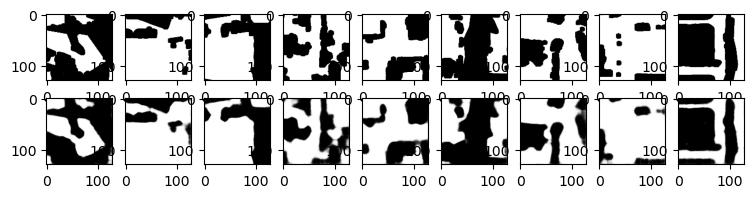

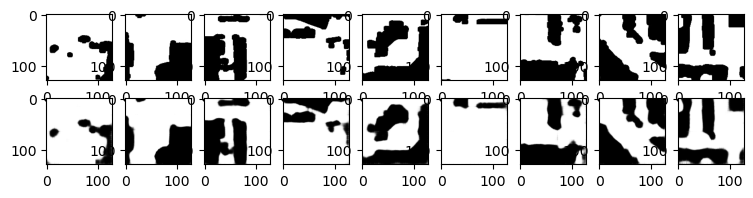

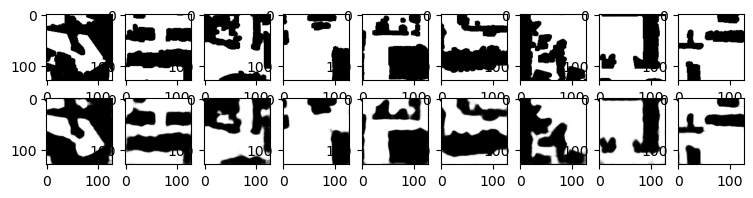

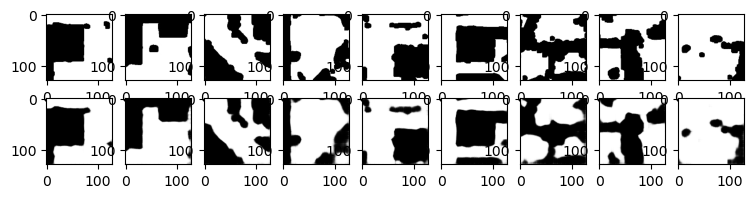

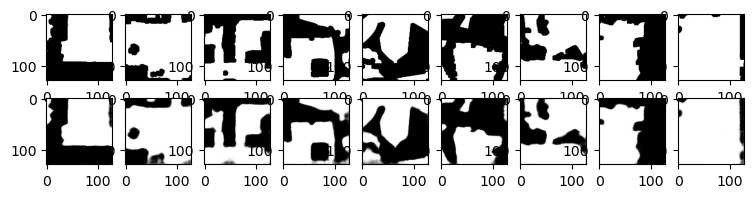

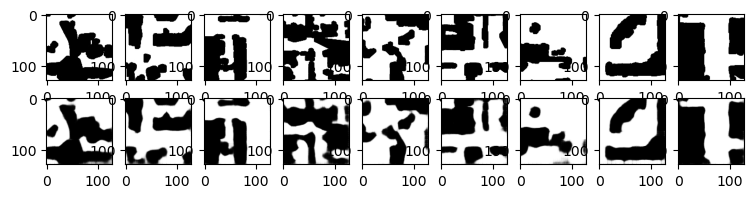

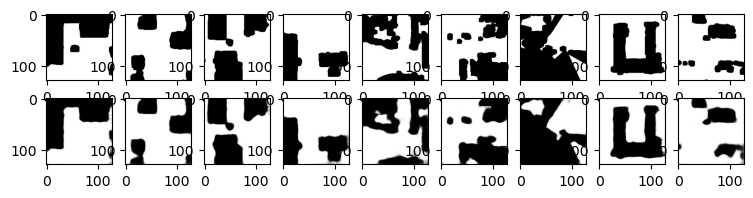

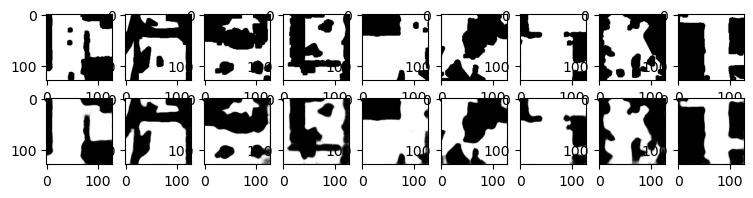

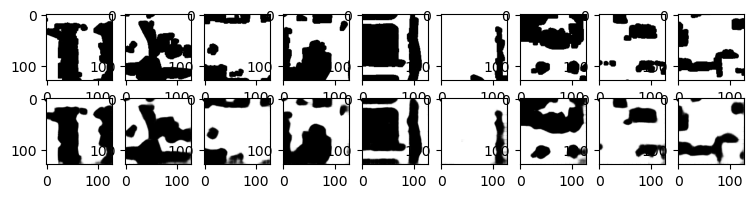

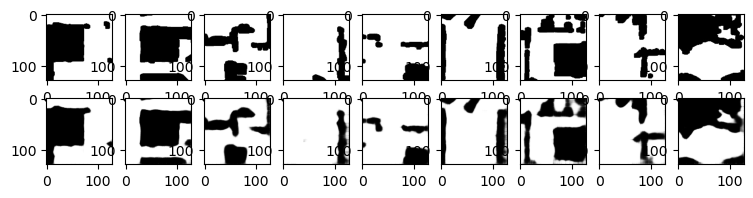

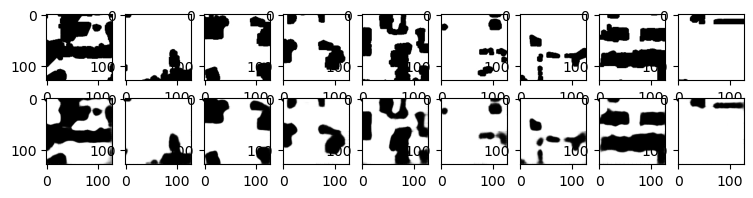

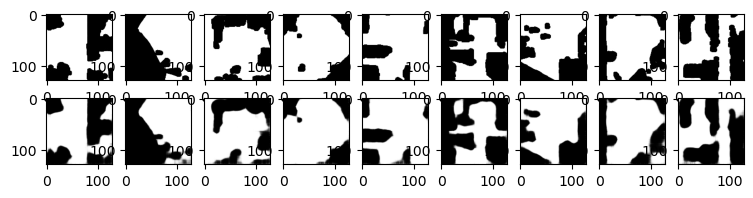

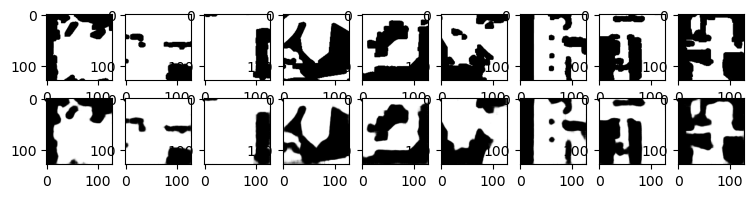

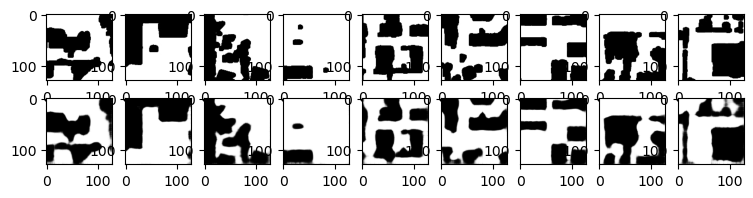

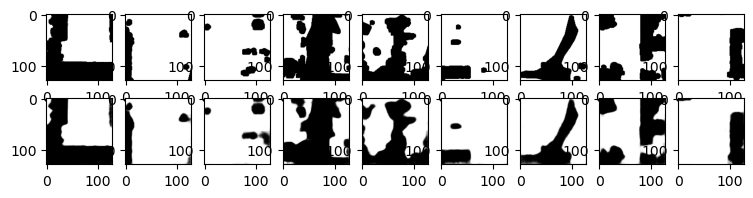

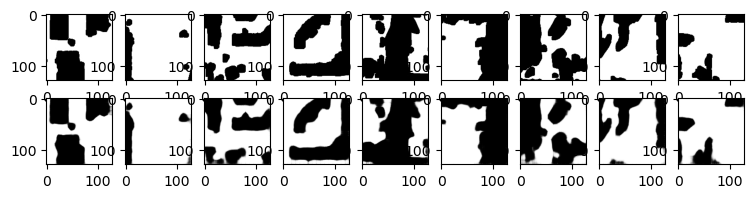

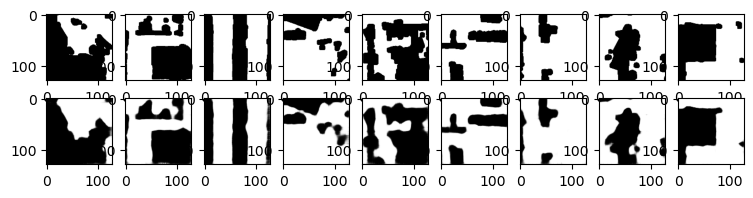

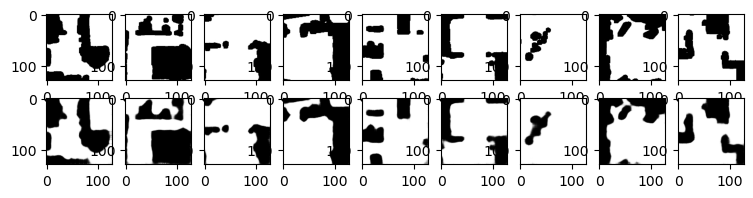

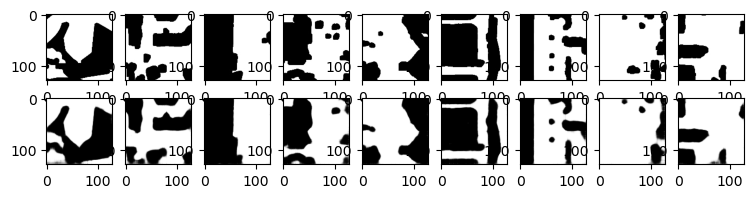

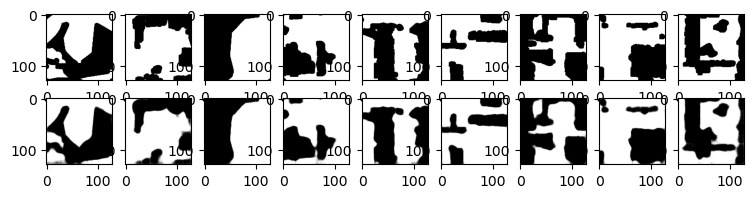

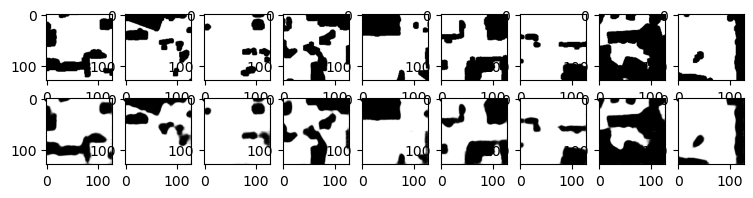

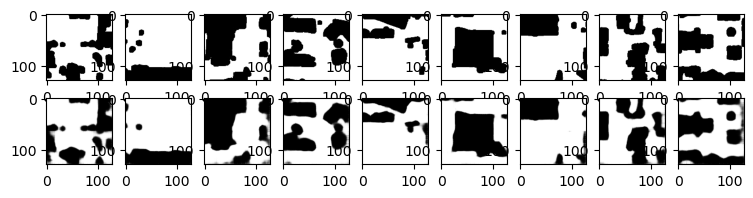

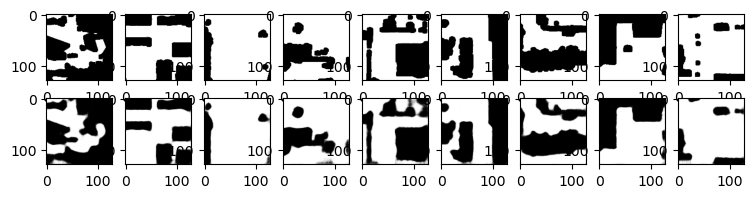

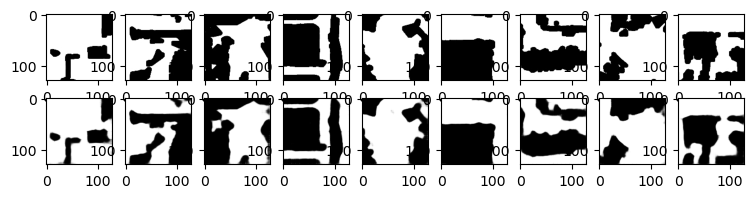

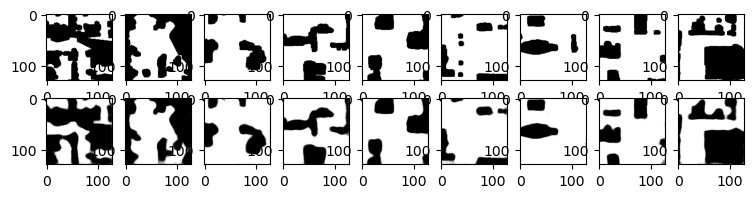

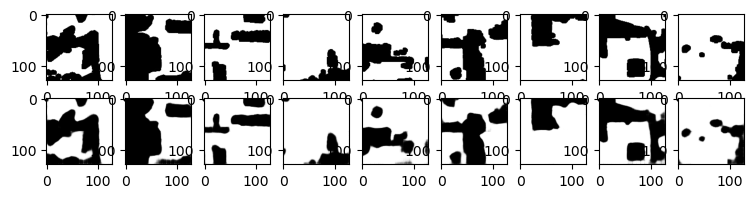

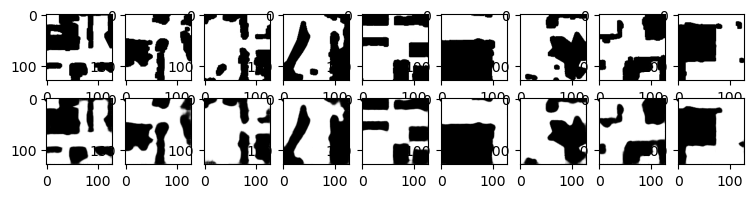

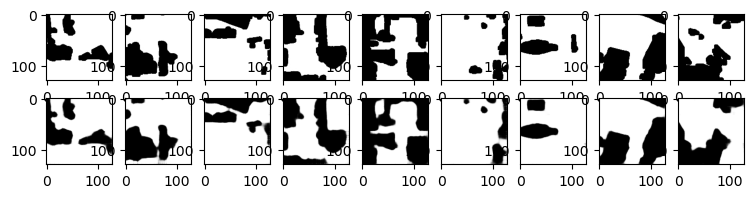

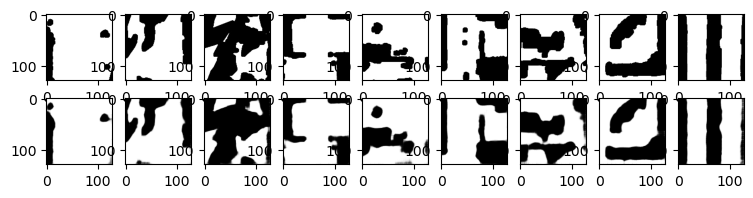

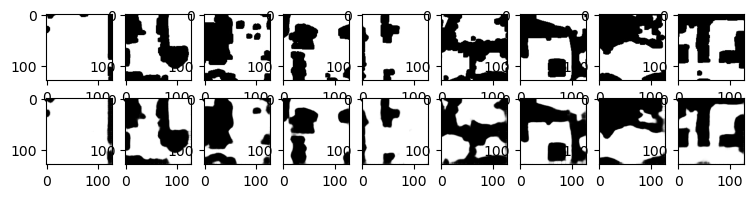

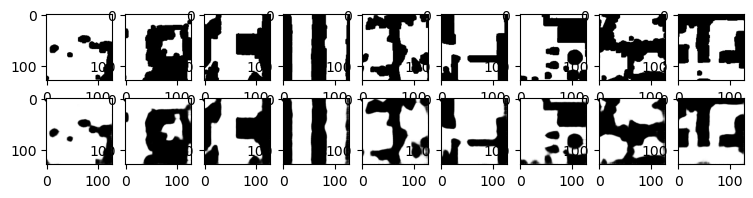

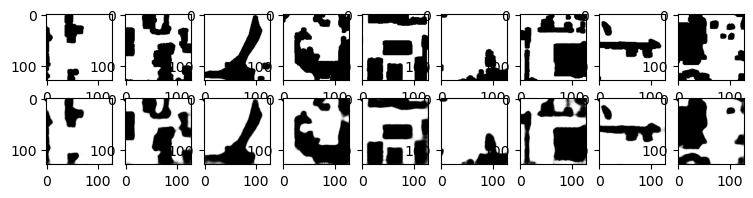

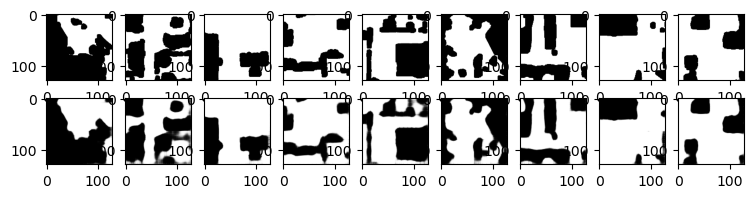

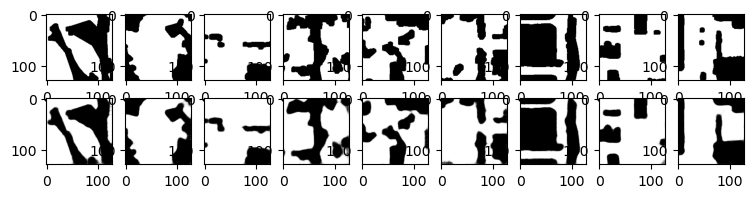

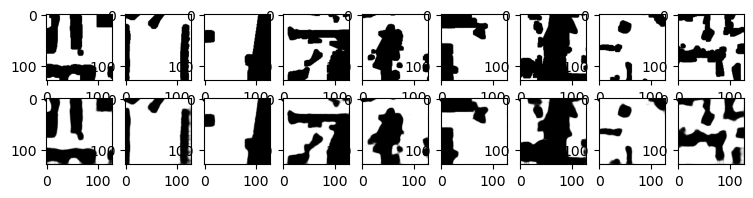

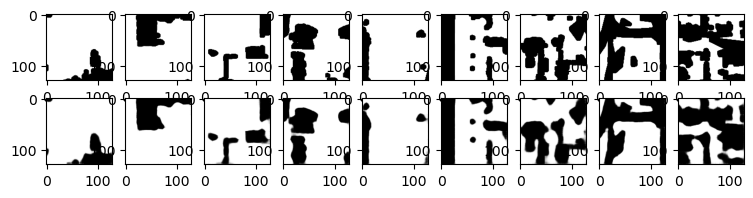

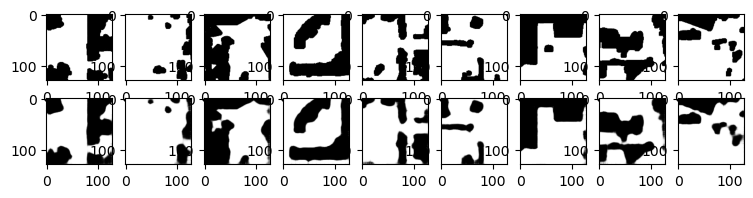

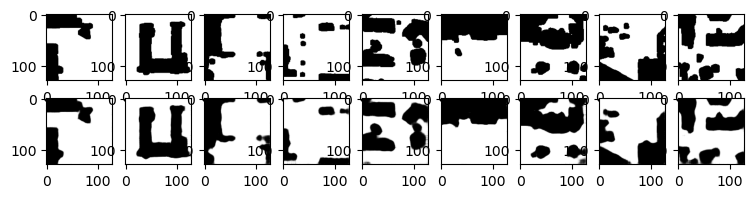

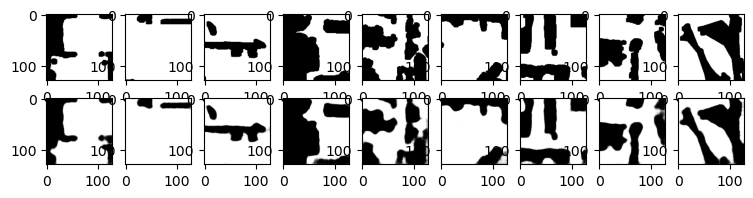

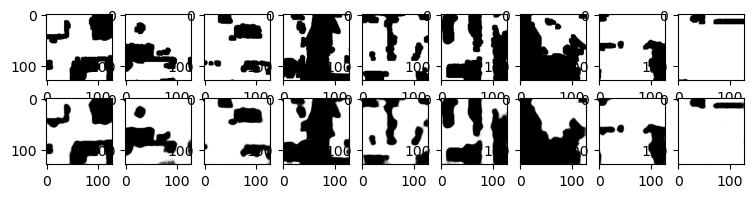

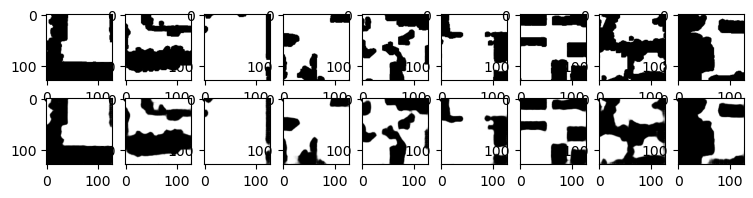

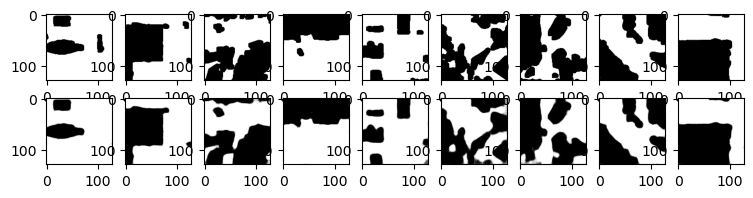

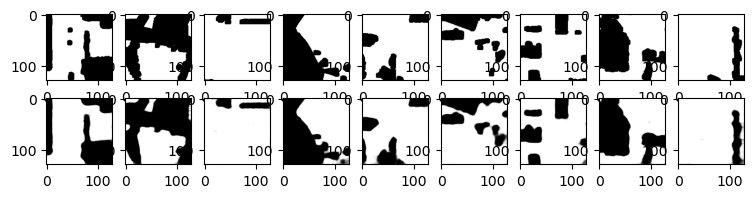

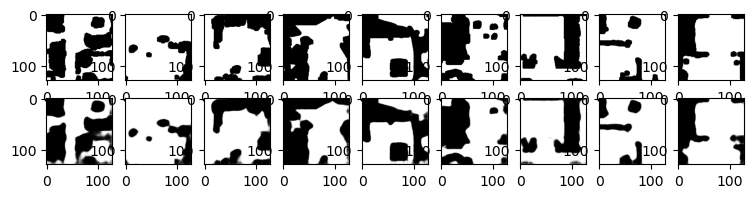

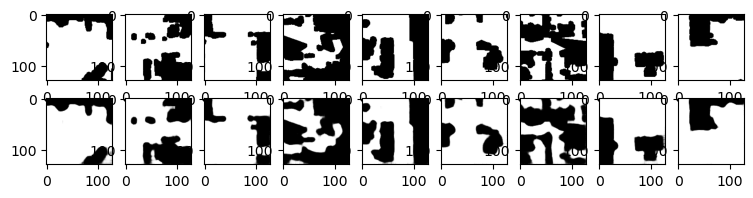

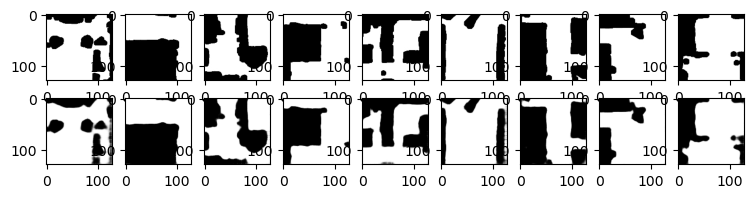

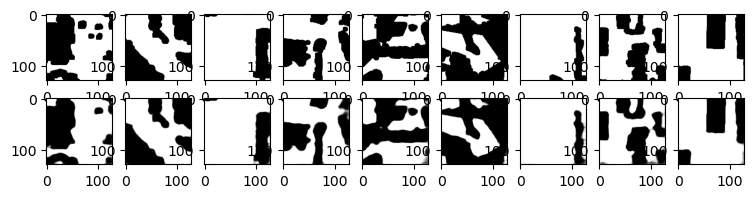

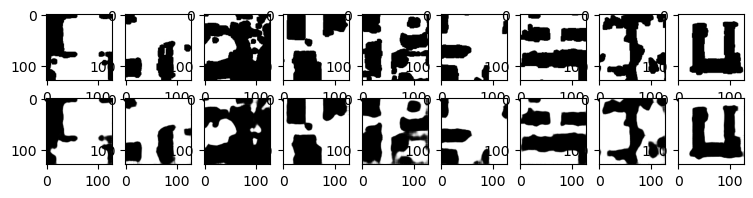

In [25]:
for k in range(0, num_epochs, 10):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])